# [Exceptions](https://docs.python.org/3.5/tutorial/errors.html#exceptions)
## Greek Myth for Exceptions: Sisyphus
>Sisyphus was son of the king Aeolus of Thessaly and Enarete, and the founder and first king of Ephyra (Corinth). He was the father of Glaucus by the nymph Merope, and the grandfather of Bellerophon.
>
> Sisyphus promoted navigation and commerce, but was avaricious and deceitful, violating the laws of hospitality by killing travelers and guests. He took pleasure in these killings because they allowed him to maintain his dominant position. From Homer onwards, Sisyphus was famed as the craftiest of men. He seduced his niece, took his brother's throne and betrayed Zeus's secrets. Zeus then ordered Hades to chain Sisyphus in Tartarus. Sisyphus slyly asked Thanatos to try the chains to show how they worked. When Thanatos did so, Sisyphus secured them and threatened Hades. This caused an uproar, and no human could die until Ares (who was annoyed that his battles had lost their fun because his opponents would not die) intervened, freeing Thanatos and sending Sisyphus to Tartarus.
>....
>As a punishment from the gods for his trickery, Sisyphus was compelled to roll a huge rock up a steep hill, but before he could reach the top of the hill, the rock would always roll back down again, forcing him to begin again.[2] The maddening nature of the punishment was reserved for Sisyphus due to his hubristic belief that his cleverness surpassed that of Zeus. [wikipedia](http://en.wikipedia.org/wiki/Sisyphus)

# Introduction to Exceptions
* Often times as programs are executed they encounter situations that left to themselves may cause the program to fail/quit. 
* For example, if I try to open a file that doesn't exist or try to perform an illegal mathematical operation. 
* Fortunately most modern computer languages, including Python, provide a mechanism for handling these situations. 
* Instead of simply dropping dead, Python programs that encounter these situations create ("throw") exceptions. 
* When an exception is thrown, program execution stops and looks for code designed specifically for dealing with ("handling") the exception. 
    * If relevant code is not found at the current program scope, the exception travels up to the previous calling scope and so on until appropriate code is found. 
    * If  no appropriate code is found, the program exits.

* The Python mechanism for dealing with these exceptions, is the **try/except** (or **try/finally**) structure. 
    * The python keyword *try* marks the beginning of a block of code, similar to and **if**, **for**, **while**, **def**, and **class**. 
    * Essentially what happens is Python *TRIES* to execute all the statements within the indented block of code associated with the **try** statement. 
    * If an exception is encountered execution jumps out of the block of code and proceeds to the associated **except/finally** statement. 
    * Once handled, the exception "disappears"" and the program continues past the **except** block. 
        * Note, it does not return to the code within the **try** block.

## Types of Exceptions
### ``FileNotFoundError``

In [1]:
fo = open("My Nobel Prize Speach.txt","r")

FileNotFoundError: [Errno 2] No such file or directory: 'My Nobel Prize Speach.txt'

In [2]:
with open("../Data/testFile.txt","r") as f0:
    data = fo.read()
    print(data)

FileNotFoundError: [Errno 2] No such file or directory: '../Data/testFile.txt'

## ``UnsupportedOperation``

In [3]:
!touch m8_test.txt

In [4]:
with open("m8_test.txt","r") as fo:
    fo.write("efgh")

UnsupportedOperation: not writable

## ``NameError``

In [6]:
a=c

NameError: name 'c' is not defined

## ``ZeroDivisionError``

In [7]:
14/0

ZeroDivisionError: division by zero

## ``ValueError``

In [8]:
import math
math.sqrt(-1)

ValueError: math domain error

In [11]:
chr(-95)

ValueError: chr() arg not in range(0x110000)

## ``TypeError``

In [12]:
b = [0,1,2,3,4,5]
b[1.5]

TypeError: list indices must be integers or slices, not float

In [13]:
print("%d"%"a")

TypeError: %d format: a number is required, not str

## Here is a basic block of try/except code.

In [ ]:
try:
    with open(input("Enter name of file to open\n"),"r") as fo:
        data = fo.read()
except:
    pass
print("So what happened?")
# What happens when I type in a nonexistant file

##  We can get more information as follows:

In [14]:
try:
    with open(input("Enter name of file to open\n"),"r") as fo:
        data = fo.read()
except Exception as error:
    print("failed due to error", error)


Enter name of file to open
ziggy
failed due to error [Errno 2] No such file or directory: 'ziggy'


## Handling Different Types of Exceptions
* As written now, the **except** will catch all types of exceptions. 
* We should be as specific as possible. 
* So we could (should?) do the following:
    * For this small fragment of code there is essentially one thing that *EXPECT* to go wrong: I can try to open a file that doesn't exist. 
    * So I would be expecting an **IOError.** I can then code a more specific except clause:


In [16]:
try:
    12/0
    with open(input("Enter name of file to open"),"r") as fo:
        data = fo.read()
    print(math.sqrt(float(input("Enter a non-negative number\n"))))
except IOError as  error:
    print ("failed due to error", error)
except ValueError as errorv:
    print(errorv,"You didn't enter a valid number")


ZeroDivisionError: division by zero

## Example
* The sinc function is defined as follows: $sinc(x) = \frac{sin(\pi x)}{\pi x}$
* What happens when $x=0$? Division by zero is undefined, but the limit of the function as x approaches zero is actually 1.
* Use **try/except** to define the sinc function


In [25]:
import math
def sinc1(x):
    try:
        return math.sin(math.pi*x)/(math.pi*x)
    except ZeroDivisionError:
        return 1

def sinc2(x):
    if x == 0:
        return 1
    else:
        return math.sin(math.pi*x)/(math.pi*x)
sinc(0)

1

In [21]:
import random

In [26]:
%timeit [sinc1(10*random.random()-5) for i in range(1000)]

580 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


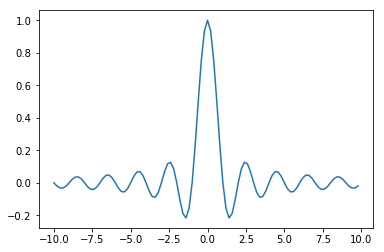

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(-10, 10, 0.2), [sinc(x) for x in np.arange(-10,10, 0.2)])

## We can raise exceptions

#### Consider our greatest common denominator function ``gcd`` or our function for computing trapezoidal area. 
#### These require all the arguments to be positive are positive. 
#### We could write a function that tests whether the numbers are both positive and  raise an exception if not

In [ ]:
def allpositive(*x):
    """
    Determines the greatest common denominator of two positive integers
    """
    for y in x:
        if y < 1:
            raise ValueError("%s: all numbers must be positive"%y)
    else:
        return True

In [ ]:
allpositive(3,5,7,-8)